<a href="https://colab.research.google.com/github/tytyty93/LazyProgrammer/blob/master/LP_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model


# Loading and Scaling the Data

4423680/4422102 [==============================] - 0s 0us/step


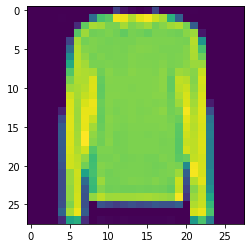

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train/255
x_test = x_test/255

plt.imshow(x_train[159])

# Reshaping the Image

In [4]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train.shape
x_test.shape

(10000, 28, 28, 1)

# Displaying the number of classes

In [5]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
K = len(set(y_train))
print("Number of unique classes in y_train:", K) 

Number of unique classes in y_train: 10


# Creating the Model

In [0]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation='relu')(i)  # 32 Filters of 3,3 shape striding at 2 and taking the input shape of i
x = Conv2D(64, (3,3), strides = 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)  # K = 10 as established on top
model = Model(i,x) # Model only has 1 input functiona and 1 output function

# Compiling and fitting the model

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5236 - accuracy: 0.8066 - val_loss: 0.3973 - val_accuracy: 0.8523
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3569 - accuracy: 0.8663 - val_loss: 0.3332 - val_accuracy: 0.8733
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3097 - accuracy: 0.8842 - val_loss: 0.3123 - val_accuracy: 0.8850
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2745 - accuracy: 0.8971 - val_loss: 0.3136 - val_accuracy: 0.8846
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2515 - accuracy: 0.9050 - val_loss: 0.2990 - val_accuracy: 0.8934
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2291 - accuracy: 0.9129 - val_loss: 0.3010 - val_accuracy: 0.8928
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2110 - accuracy: 0.9199 - val_loss: 0.2882 - val_accuracy:

# Plotting the loss


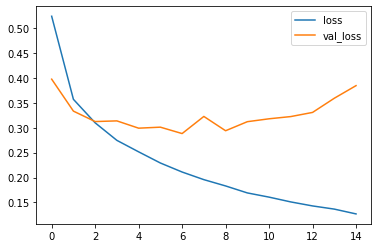

In [12]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

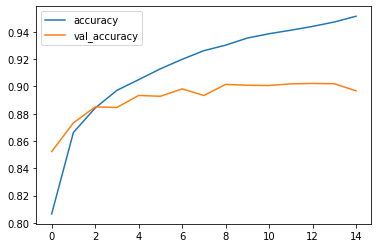

In [13]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

# Plotting confusion Matrix

Confusion matrix, without normalization
[[847   1  20  17   4   1 102   0   8   0]
 [  5 973   2  15   2   0   1   0   2   0]
 [ 14   0 824   9  56   0  93   0   4   0]
 [ 17   9  14 900  27   0  30   0   3   0]
 [  0   1  47  23 827   0  98   0   4   0]
 [  0   0   0   1   0 966   0  23   3   7]
 [113   1  54  24  70   0 724   0  14   0]
 [  0   0   0   1   0   3   0 973   0  23]
 [  1   0   3   1   3   2   6   3 981   0]
 [  1   0   0   0   0   5   0  41   0 953]]


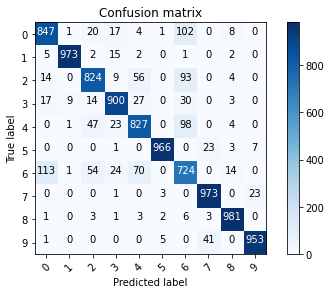

In [14]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


Label Mapping

In [0]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

# Identifying Misclassified samples

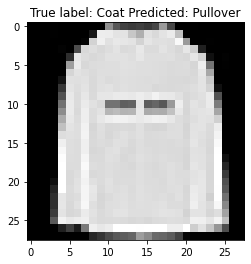

In [19]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));